In [68]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plts
import seaborn as sns

In [69]:
df_TranAftCamp, df_Credit, df_Customers,df_transactions = [pd.read_csv(f) for f in ['./Data/avg_transactions_after_campaign.csv', './Data/credit_profiles.csv','./Data/customers.csv','./Data/transactions.csv']]

In [70]:
df_transactions2 = df_transactions.copy()
df_transactions2.shape, df_transactions.shape

((500000, 7), (500000, 7))

In [71]:
df_transactions2.head(5)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [72]:
df_transactions2.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [73]:
df_transactions2.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

In [74]:
df_transactions2.product_category.value_counts()

product_category
Electronics               134535
Fashion & Apparel         116892
Kitchen Appliances         57353
Beauty & Personal Care     56065
Sports                     49704
Home Decor                 38355
Garden & Outdoor           23644
Books                      13635
Toys & Games                9817
Name: count, dtype: int64

In [75]:
pd.DataFrame(df_transactions2.groupby('platform').product_category.value_counts(dropna=False))

count
platform product_category             
Alibaba  Electronics             19207
         Fashion & Apparel       17173
         Kitchen Appliances       8603
         Beauty & Personal Care   8475
         Sports                   7346
...                                ...
Shopify  Sports                   3948
         Home Decor               3141
         Garden & Outdoor         1809
         Books                    1155
         Toys & Games              757

[63 rows x 1 columns]

<Axes: xlabel='count', ylabel='product_category'>

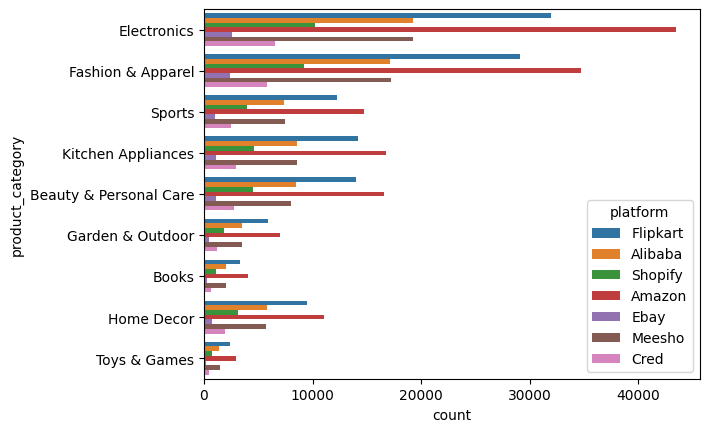

In [76]:
sns.countplot(y='product_category', hue='platform', data=df_transactions2)

In [77]:
df_transactions2['platform'].fillna(df_transactions.platform.mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16688\708532720.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transactions2['platform'].fillna(df_transactions.platform.mode()[0], inplace=True)


In [78]:
df_transactions2.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [79]:
df_filtered = df_transactions2[(df_transactions2['platform'] == 'Amazon') & 
                               (df_transactions2['product_category'] == 'Electronics') & 
                               (df_transactions2['payment_type'] == 'Credit Card')]
df_filtered.head(5)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [80]:
df_filtered[df_filtered.tran_amount==0].shape

(4734, 7)

In [81]:
df_transactions2[df_transactions2.tran_amount==0].shape

(4734, 7)

In [82]:
###### Analysis of the data shows all transactions with zero amount are from Amazon, Electronics and Credit Card.

In [83]:
median_tran_amount = df_transactions2[df_transactions2['tran_amount'] > 0]['tran_amount'].median()
median_tran_amount

np.float64(143.0)

In [84]:
df_transactions2['tran_amount'] = df_transactions2['tran_amount'].replace(0, median_tran_amount)

In [85]:
df_transactions2[df_transactions2.tran_amount==0].shape

(0, 7)

In [86]:
df_filtered[df_filtered.tran_amount==0].shape

(4734, 7)

In [87]:
##### Transaction column has been cleaned of zero values and replaced with the mean 

In [ ]:
##### Law of Large Numbers, Central Lithium Theorem, and the Law of Averages

In [ ]:
##### Law of Large Numbers states that the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

In [ ]:
##### Central Lithium Theorem states that the distribution of the sum (or average) of a large number of independent, identically distributed variables will be approximately normally distributed, regardless of the shape of the original distribution.
#### if individual obercations are made and the mean of this is plotted, the distribution will be normal

In [ ]:
##### Law of Averages states that the result of a large number of trials will tend to approach the expected value.